# Pandas

Pandas is one of the most popular Python libraries for Data Science and Analytics

### Core Componants

## **Series**
A column in  a DataFrame.

## **DataFrames**
A multidimensional table made up of a collection of Series.

The two are very smilar, can perform filling null and calculating mean in both.

### Pandas Installation and  Import

The ! at the beginning of a cell runs the cell as if it were in a ternminal.

In [0]:
!pip3 install pandas
!pip3 install plotly
!pip3 install numpy

Imports are done using a shorter name for convinience.

In [0]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [0]:
# This is to show plotly graphs on GitHub
!pip install plotly>=4.7.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [0]:
# Data set base url used to acces all the data files
baseURL = "https://gist.githubusercontent.com/alti-tude/710cb9d4dfc7ebcd0afb9cf93d8f6a8d/raw/574730ba009e69b81d6c79f2fef2c3dd5145db0a/"

### Creating DataFrames from Scratch

A great option is to use a simple dictionary, that is dict.

Consider a fruit stand that sells apples and oranges and a dictionary containing customer purchases of the items.

In [0]:
data = {
    'apples' : [3, 2, 0, 1],
    'oranges' : [0, 3, 7, 2]
}

The dictionary is then passed to the pandas DataFrame constructor.

Each (key, value) item in data corresponds to a collumn in the resulting DataFrame.

In [0]:
purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


### Indexing DataFrames

The indices of the DataFrame were given to us on creation as the numbers seen above, but we can create our own during initialization.

The indices can then be used to locate an entry in the DataFrame.

In [1]:
# Two ways to customize the index
purchases = pd.DataFrame(data, index = ['Astitva', 'Trusha', 'Abhinav', 'Shivansh'])
purchases.set_index(np.array(['Astitva', 'Trusha', 'Abhinav', 'Shivansh']))
purchases

NameError: name 'pd' is not defined

In [2]:
purchases.loc['Astitva']

NameError: name 'purchases' is not defined

### Reading In Data 

### **CSV**

CSVs dont have indices like DataFrames, so all we need to do is just designate the index_col while reading the CSV

Most CSVs won't ever require or have an index column though.

In [0]:
df = pd.read_csv(base_url + 'purchases.csv')
print(df)
print()
df = pd.read_csv(base_url + 'purchases.csv', index_col=0)
print(df)

  Unnamed: 0  apples  oranges
0       June       3        0
1     Robert       2        3
2       Lily       0        7
3      David       1        2

        apples  oranges
June         3        0
Robert       2        3
Lily         0        7
David        1        2


### **JSON**

A JSON file is essentially a stored Python dictionary. Looks like it is much easier to read.

Index comes correctly as JSON allows indices to work through nesting.

In [0]:
df = pd.read_json(base_url + 'purchases.json')
df

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


## DataFrame Operations

Operations crucial to any data analysis from simple tranformations to fundamental statistical analysis.

In [0]:
movies_df = pd.read_csv(baseURL + "IMDB-Movie-Data.csv", index_col="Title")

### **Viewing Data**

Opening a few rows to use as an indicator of the structure of the DataFrame.

head() and tail() can take row numbers as arguments.

In [0]:
movies_df.head() # Five rows by default

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [0]:
movies_df.tail() # Five rows by default

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


### **Information About Data**

Essential details about the dataset such as the number of rows, columns, non-null values, what type of data is in each column and how much memory your DataFrame is using.

Shape of the DataFrame can also be known.

In [0]:
# Should be the first command you run after loading the data
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   genre             1000 non-null   object 
 2   description       1000 non-null   object 
 3   director          1000 non-null   object 
 4   actors            1000 non-null   object 
 5   year              1000 non-null   int64  
 6   runtime           1000 non-null   int64  
 7   rating            1000 non-null   float64
 8   votes             1000 non-null   int64  
 9   revenue millions  872 non-null    float64
 10  metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 133.8+ KB


In [0]:
movies_df.shape

(1000, 11)

In [0]:
# Used to list all the items of all the stats and the percentiles
movies_df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


### **Handling Duplicates**

Creating a temporary DataFrame with duplicate rows by appending to show how to handle duplicates.

Simple function to drop duplicates is then used.

In [0]:
temporary_df = movies_df.append(movies_df)
temporary_df.shape

(2000, 11)

In [0]:
temporary_df = temporary_df.drop_duplicates()
temporary_df.shape

(1000, 11)

### **Column Cleanup**

Many times DataFrame will have verbose column names with symbols, typos and what not. To select columns with ease we perform column cleanup.

(.columns) comes in handy when renaming columns and also used to understand why one is recieving KeyError when selecting data by column.

It is good to:
  - Replace spaces with underscores
  - Remove special characters
  - Keep all lower case   

In [0]:
movies_df.rename(columns={
    'Runtime (Minutes)': 'Runtime',
    'Revenue (Millions)': 'Revenue Millions'
})

In [0]:
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 'rating', 'votes', 'revenue millions', 'metascore']
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue millions', 'metascore'],
      dtype='object')

### **Missing Or Null Values**

Place holders for non-existent values are common in real datasets.
None in Python and NumPy's np.nan.

Two ways to deal:
- Delete rows or columns with nulls  
- Replace the null values: **Imputation**

First must gauge how many nulls exist in the DataFrame.

In [0]:
movies_df.info()
# Returns a boolen DataFrame telling if null or not 
movies_df.isnull()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   genre             1000 non-null   object 
 2   description       1000 non-null   object 
 3   director          1000 non-null   object 
 4   actors            1000 non-null   object 
 5   year              1000 non-null   int64  
 6   runtime           1000 non-null   int64  
 7   rating            1000 non-null   float64
 8   votes             1000 non-null   int64  
 9   revenue millions  872 non-null    float64
 10  metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


,rank,genre,description,director,actors,year,runtime,rating,votes,revenue millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,False,False,False,False,False,False,False,False,False,False,False
Prometheus,False,False,False,False,False,False,False,False,False,False,False
Split,False,False,False,False,False,False,False,False,False,False,False
Sing,False,False,False,False,False,False,False,False,False,False,False
Suicide Squad,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,False,False,False,False,False,False,False,False,False,True,False
Hostel: Part II,False,False,False,False,False,False,False,False,False,False,False
Step Up 2: The Streets,False,False,False,False,False,False,False,False,False,False,False


In [0]:
# Returns a new DataFrame where every row with one or more null values ahas been removed 
movies_df.dropna()

### **Imputation**

Dropping rows leads to loss of data from the dataset hence nulls in a column can be replaced by the ***mean value*** or the ***median value*** of that column.

This way a large weight isn't given to that particular entry, however the data is not lost.

In [0]:
# Extract the column into its own variable
revenue = movies_df['revenue millions']

# Takes the mean along the column
revenue_mean = revenue.mean()
revenue_mean
revenue.fillna(revenue_mean, inplace=True)

# Can now see that 'revenue millions' has 1000 non null values!
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1000 non-null   int64  
 1   genre             1000 non-null   object 
 2   description       1000 non-null   object 
 3   director          1000 non-null   object 
 4   actors            1000 non-null   object 
 5   year              1000 non-null   int64  
 6   runtime           1000 non-null   int64  
 7   rating            1000 non-null   float64
 8   votes             1000 non-null   int64  
 9   revenue millions  1000 non-null   float64
 10  metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 133.8+ KB


In [0]:
# The mean() function takes the mean along any column with a numeric datatype
movies_df.mean()

rank                   500.500000
year                  2012.783000
runtime                113.172000
rating                   6.723200
votes               169808.255000
revenue millions        82.956376
metascore               58.985043
dtype: float64

### **Slicing, Selecting, Extracting**

Most frequently used operations to manipulate views of the DataFrame

### By Column

A Series is returned when you extract a column.

You can extract multiple columns as a DataFrame, using a list of column indices as the argument.




In [0]:
# Single column
genre_col = movies_df['genre']
print(type(genre_col))
genre_col

<class 'pandas.core.series.Series'>


Title
Guardians of the Galaxy     Action,Adventure,Sci-Fi
Prometheus                 Adventure,Mystery,Sci-Fi
Split                               Horror,Thriller
Sing                        Animation,Comedy,Family
Suicide Squad              Action,Adventure,Fantasy
                                     ...           
Secret in Their Eyes            Crime,Drama,Mystery
Hostel: Part II                              Horror
Step Up 2: The Streets          Drama,Music,Romance
Search Party                       Adventure,Comedy
Nine Lives                    Comedy,Family,Fantasy
Name: genre, Length: 1000, dtype: object

In [0]:
# Multiple columns
genre_col = movies_df[['genre', 'rating']]
print(type(genre_col))
genre_col 

<class 'pandas.core.frame.DataFrame'>


,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2
...,...,...
Secret in Their Eyes,"Crime,Drama,Mystery",6.2
Hostel: Part II,Horror,5.5
Step Up 2: The Streets,"Drama,Music,Romance",6.2


### By Rows

There are two options here:
- `loc` : Locates by name 
- `iloc`: Locates by numerical index

Note: iloc removes the index number/ name!



In [0]:
# We indexed the movie by 'Title' hence we give loc a title of a movie
prom = movies_df.loc['Prometheus']
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

In [0]:
# We can see that the movie we want is at the second row and hence index value 1 can be used
prom = movies_df.iloc[1]
prom

rank                                                                2
genre                                        Adventure,Mystery,Sci-Fi
description         Following clues to the origin of mankind, a te...
director                                                 Ridley Scott
actors              Noomi Rapace, Logan Marshall-Green, Michael Fa...
year                                                             2012
runtime                                                           124
rating                                                              7
votes                                                          485820
revenue millions                                               126.46
metascore                                                          65
Name: Prometheus, dtype: object

### Slicing

Selecting multiple rows using loc and iloc.

In [0]:
# Name indexing
movie_subset = movies_df.loc['Prometheus':'Sing']
print(movie_subset)

# Integer indexing
movie_subset = movies_df.iloc[1:4]
print(movie_subset)
# Last indecx is not included that is movie at index 4 is not included

            rank                     genre  ... revenue millions metascore
Title                                       ...                           
Prometheus     2  Adventure,Mystery,Sci-Fi  ...           126.46      65.0
Split          3           Horror,Thriller  ...           138.12      62.0
Sing           4   Animation,Comedy,Family  ...           270.32      59.0

[3 rows x 11 columns]
            rank                     genre  ... revenue millions metascore
Title                                       ...                           
Prometheus     2  Adventure,Mystery,Sci-Fi  ...           126.46      65.0
Split          3           Horror,Thriller  ...           138.12      62.0
Sing           4   Animation,Comedy,Family  ...           270.32      59.0

[3 rows x 11 columns]


### Conditional Selection

Filtering rows based on boolean evalueated statements. Use of logical operators  for 'and', 'or' is permitted as well.  

In [0]:
# Evaluates every entry in the 'director' series to check if equal to Ridley Scott
movies_df['director'] == "Ridley Scott"

Title
Guardians of the Galaxy    False
Prometheus                  True
Split                      False
Sing                       False
Suicide Squad              False
                           ...  
Secret in Their Eyes       False
Hostel: Part II            False
Step Up 2: The Streets     False
Search Party               False
Nine Lives                 False
Name: director, Length: 1000, dtype: bool

In [0]:
# Entries where director ia as chosen
movies_df[movies_df['director'] == "Ridley Scott"].head(1)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [0]:
movies_df[movies_df['rating'] >= 9].head(1)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue millions,metascore
Title,,,,,,,,,,,
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [0]:
# Or statements
movies_df[(movies_df['director'] == "Ridley Scott") | (movies_df['director'] == "Christopher Nolan")].head(1)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue millions,metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


In [0]:
# And entries, made below 25th percentile in revenue
movies_df[(movies_df['rating'] >= 8) 
          & (movies_df['year'] >= 2005)
          & (movies_df['year'] <= 2010)
          & (movies_df['revenue millions'] < movies_df['revenue millions'].quantile(0.25)) ].head(1)

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0


#### **Applying Funtions**

Iteration in large data sets is time consuming hence functions are used. When you want to do something with each row entry in the dataset, use the apply() function as it uses vectorisation.


In [0]:
def rating_function(x):
  if x >= 8.0:
    return "good"
  else:
    return "bad"

movies_df['rating category'] = movies_df['rating'].apply(rating_function)
movies_df.head()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue millions,metascore,rating category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,bad
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,bad
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,bad


In [0]:
# Does the same as above adds a new column
movies_df['rating category '] = movies_df['rating'].apply(lambda x: 'good' if x >= 8.0 else 'bad')
movies_df.head()

## Tasks

### Load Data
Load the data from MusicTop50.csv into a Pandas DataFrame.

In [6]:
music_df = pd.read_csv(baseURL + 'MusicTop50.csv')
print(music_df.shape)
music_df.info()

(50, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          50 non-null     int64  
 1   Track.Name          50 non-null     object 
 2   Artist.Name         50 non-null     object 
 3   Genre               50 non-null     object 
 4   Beats.Per.Minute    48 non-null     float64
 5   Energy              49 non-null     float64
 6   Danceability..db..  50 non-null     int64  
 7   Loudness..          50 non-null     int64  
 8   Liveness.           48 non-null     float64
 9   Valence ()          49 non-null     float64
 10  Length              47 non-null     float64
 11  Acousticness        50 non-null     int64  
 12  Speechiness         50 non-null     int64  
 13  Popularity          49 non-null     float64
dtypes: float64(6), int64(5), object(3)
memory usage: 5.6+ KB


### Visualize Data

View the starting and ending five rows of the DataFrame

In [7]:
music_df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability..db..,Loudness..,Liveness.,Valence (),Length,Acousticness,Speechiness,Popularity
0,1,Se�orita,Shawn Mendes,canadian pop,117.0,55.0,76,-6,8.0,75.0,191.0,4,3,79.0
1,2,China,Anuel AA,reggaeton flow,105.0,81.0,79,-4,8.0,61.0,302.0,8,9,92.0
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40,-4,16.0,70.0,186.0,12,46,85.0
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64,-8,8.0,55.0,198.0,12,19,86.0
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,NaN,65.0,58,-4,11.0,18.0,175.0,45,7,94.0


In [8]:
music_df.tail()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability..db..,Loudness..,Liveness.,Valence (),Length,Acousticness,Speechiness,Popularity
45,46,One Thing Right,Marshmello,brostep,88.0,62.0,66,-2,NaN,44.0,182.0,7,5,88.0
46,47,Te Robar�,Nicky Jam,latin,176.0,75.0,67,-4,8.0,80.0,202.0,24,6,88.0
47,48,Happier,Marshmello,brostep,100.0,79.0,69,-3,17.0,67.0,214.0,19,5,88.0
48,49,Call You Mine,The Chainsmokers,edm,104.0,70.0,59,-6,41.0,50.0,218.0,23,3,88.0
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95.0,79.0,75,-6,7.0,61.0,206.0,21,12,82.0


### Clean Data

### **Column Names**

Create better column names adhering to convention and easy to use.

### **Values**

Take care of the missing/ null values present in the DataFrame.

In [9]:
music_df.columns = ['index','track name', 'artist name', 'genre', 'beats per min', 'energy', 'dancebility dB', 'loudness', 'liveness', 'valence', 'length', 'acousticness', 'speechiness', 'popularity']
music_df.columns

Index(['index', 'track name', 'artist name', 'genre', 'beats per min',
       'energy', 'dancebility dB', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

In [0]:
music_df.head()

In [0]:
def imputation(column):
  mean_value = column.mean()
  column.fillna(mean_value, inplace=True)

imputation(music_df['beats per min'])
imputation(music_df['energy'])
imputation(music_df['liveness'])
imputation(music_df['valence'])
imputation(music_df['length'])
imputation(music_df['popularity'])

In [11]:
# Can be done in a smart way as shown
music_df.fillna(music_df.mean()).head()
# No null values anymore
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           50 non-null     int64  
 1   track name      50 non-null     object 
 2   artist name     50 non-null     object 
 3   genre           50 non-null     object 
 4   beats per min   50 non-null     float64
 5   energy          50 non-null     float64
 6   dancebility dB  50 non-null     int64  
 7   loudness        50 non-null     int64  
 8   liveness        50 non-null     float64
 9   valence         50 non-null     float64
 10  length          50 non-null     float64
 11  acousticness    50 non-null     int64  
 12  speechiness     50 non-null     int64  
 13  popularity      50 non-null     float64
dtypes: float64(6), int64(5), object(3)
memory usage: 5.6+ KB


### Query Data

Find the loudest song by the artist who has the least popular song in the DataFrame.

In [12]:
least_popular_artist = music_df[music_df['popularity'] == min(music_df['popularity'])].iloc[0]['artist name']
max_loudness = music_df[music_df['artist name'] == least_popular_artist]['loudness'].max()

music_df[(music_df['artist name'] == least_popular_artist) & (music_df['loudness'] == max_loudness)]

,index,track name,artist name,genre,beats per min,energy,dancebility dB,loudness,liveness,valence,length,acousticness,speechiness,popularity
25,26,If I Can't Have You,Shawn Mendes,canadian pop,119.354167,82.0,69,-4,13.791667,87.0,191.0,49,6,70.0


### Plot Data

Plotly is better in terms of labels and size. Only by default though. Matplotlib can be customised to be made awesome.


More lightweight that matplotlib.

In [13]:
music_df.columns

Index(['index', 'track name', 'artist name', 'genre', 'beats per min',
       'energy', 'dancebility dB', 'loudness', 'liveness', 'valence', 'length',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

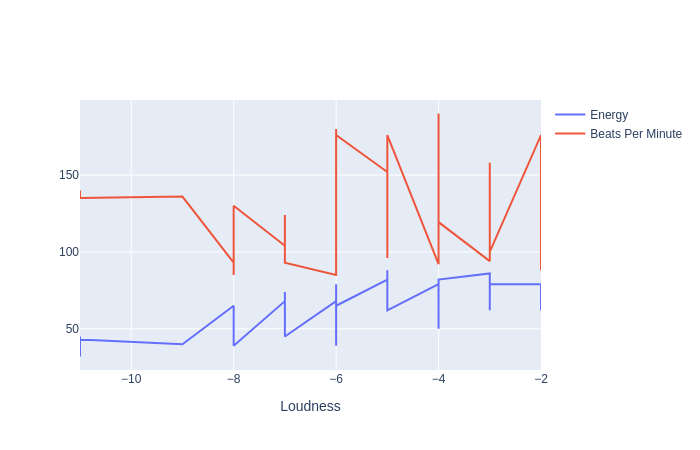

In [14]:
# Get a figure
fig = go.Figure()

# Add two scatter graphs to a trace created in the figure
# Scatter is line plot in plotly
# Can customise using modes

fig.add_trace(go.Scatter(x = music_df.sort_values(by = 'loudness')['loudness'],
                         y = music_df.sort_values(by = 'loudness')['energy'],
                         name = "Energy"))

fig.add_trace(go.Scatter(x = music_df.sort_values(by = 'loudness')['loudness'],
                         y = music_df.sort_values(by = 'loudness')['beats per min'],
                         name = "Beats Per Minute"))

# Used to label x axis, y axis and give title
fig.update_layout(xaxis_title="Loudness")
fig.show("png")

In [15]:
names, counts = np.unique(music_df['artist name'], return_counts=True)
# print(names) 
# print(counts)

# Create DataFrame using the arrays
newDF = pd.DataFrame.from_dict(dict(zip(names,counts)), orient="index").reset_index()
newDF.columns = ["names", "counts"]
# Descending sort
newDF.sort_values("counts", ascending=False).head()

,names,counts
9,Ed Sheeran,4
19,Lil Nas X,2
32,Shawn Mendes,2
25,Marshmello,2
28,Post Malone,2


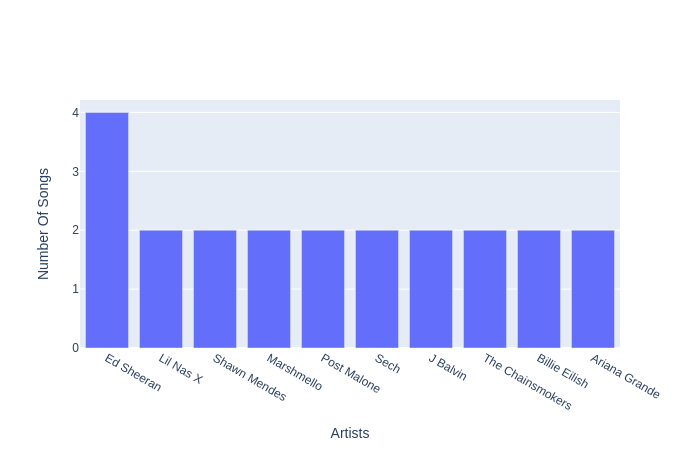

In [16]:
newDF.sort_values("counts", ascending=False, inplace=True)
fig = go.Figure(data = go.Bar(x = newDF.iloc[:10].names,
                              y = newDF.iloc[:10].counts))
fig.update_layout(xaxis_title="Artists",
                  yaxis_title="Number Of Songs")
fig.show("png")